# <center>Network Science</center>

## <center>Home Assignment #2: Network models</center>

### <center>Student: Muratova Anna</center>

#### <hr /> General Information

**Due Date:** 28.02.2016 23:59 <br \>
**Late submission policy:** -0.2 points per day <br \>


Please send your reports to <mailto:network.hse.2016@gmail.com> with message subject of the following structure:<br \> **[HSE Networks 2015] *{LastName}* *{First Name}* HA*{Number}***

Support your computations with figures and comments. <br \>
If you are using IPython Notebook you may use this file as a starting point of your report.<br \>
<br \>
<hr \>

## Problems

### Task 1

Consider Barabasi and Albert dynamical grow model. Two main ingredients of this model are *network growing* and *prefferential attachment*. Implement two restricted B&A-based models:
<br \>

**Model A**
<br \>
Lack of prefferential attachment, that is at each time-step form edges uniformly at random while network keeps growing.

**Model B**
<br \>
Lack of growing, that is fix total number of nodes, on each time-step randomly choose one and form edges with prefferential attachment.
<br \>

1. Generate networks according to the models above ($N > 1000$ nodes)
2. Compute CDF/PDF, describe the distribution and compute\describe its properties.
3. Illustate the following dependencies: 
    * average path length to the number of nodes
    * average clustering coefficient to the number of nodes
    * average node degee to the nodes "age"
4. Is scale-free property conserved in these models?

Analyse results with respect to various parameter settings

In [ ]:
-*- coding: latin-1 -*-

import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
import time

def graph_model_a(n, m):
    """ Model A - graph of n nodes is grown by attaching new nodes with m edges
        without preferential attachment
    """
    G = nx.empty_graph(1)   # Create graph with one node
    apl = np.array([0.0 for i in xrange(n)])  # Average Path Length for size of Graph
    acc = np.array([0.0 for i in xrange(n)])  # Average Clustering Coefficient  for size of Graph

    for i in xrange(1, n):
        G.add_node(i)       # add node
        for j in xrange(m):            
            G.add_edge(i, random.randint(0, i-1))     # add random edge for new node          
        apl[i] = nx.average_shortest_path_length(G)
        acc[i] = nx.average_clustering(G)
    return G, apl, acc
    
def graph_model_b(n, m):
    """ Model B - fixed total number of nodes, 
        on each time-step randomly choose one and form m edges 
        with preferential attachment
    """
    G = nx.empty_graph(n)   # Create graph with n nodes
    nodes = list(xrange(n))  # List of nodes
    
    for k in xrange(n*20/m):
        i = random.randint(0, n-1)
        for j in xrange(m):
            node = nodes[random.randint(0, len(nodes)-1)]
            while node==i or G.has_edge(i, node):      # if edge to itself or exist
                node = nodes[random.randint(0, len(nodes)-1)]
            nodes.append(node)  # add repeated node to list
            G.add_edge(i, node) # add edge to random node preferential       
    return G
    
def PDF_CDF_nodes_degree(G, graph_model):
    h  = nx.degree_histogram(G)
    pdf = np.arange(len(h), dtype=np.float)    
    cdf = np.arange(len(h), dtype=np.float)
    cdfsum = 0.0
    for i in xrange(len(h)):
        pdf[i] = float(h[i])/float(nx.number_of_nodes(G))
        cdf[i] = cdfsum + pdf[i]
        cdfsum = cdf[i]
        
    plt.title("PDF and CDF of nodes degree for " + graph_model + " Graph")
    plt.plot(pdf)
    plt.plot(cdf)
    plt.show()

  
print "=============================================="
print "    HA-2    Task-1"

n = 1010
m = 3
print time.ctime()
print "============================================="
print "    Barabasi Albert Graph, m =", m
print "============================================="
G = nx.barabasi_albert_graph(n, m)
PDF_CDF_nodes_degree(G,  "Barabasi Albert")
print nx.info(G)
print "Average Clustering of BA = ", nx.average_clustering(G)

print "============================================="
print "    Model A"
print "============================================="

GA, APLa, ACCa = graph_model_a(n, m)
GA.name="Model-A Graph"
PDF_CDF_nodes_degree(GA, "Model-A")

plt.title("Average Path Length to the number of nodes")
plt.plot(APLa)
plt.show()
    
plt.title("Average Clustering Coefficient to the number of nodes")
plt.plot(ACCa)
plt.show()

y = np.empty_like(GA.nodes())
for i in xrange(0, len(GA)):
    y[i] = GA.degree(i)
plt.title("Nodes degree depending on age (0 - oldest)")
plt.plot(y)
plt.show()

print nx.info(GA)
print "Average Path Length = ", nx.average_shortest_path_length(GA)
print "Average Clustering Coefficient = ", nx.average_clustering(GA)
print time.ctime()

print " "
print "=============================================="
print "    Model B"
print "=============================================="

GB = graph_model_b(n, m)
GB.name="Model-B Graph"
PDF_CDF_nodes_degree(GB, "Model-B")

#nx.draw_networkx(GB)
print "Number of nodes is fixed, so can not calculate and draw for varying number of nodes: "
print "    - average path length"
print "    - average clustering coefficient"
print "All nodes have equal age"
print "----------------------------------------------"
print nx.info(GB)
print "Average Path Length = ", nx.average_shortest_path_length(GB)
print "Average Clustering Coefficient = ", nx.average_clustering(GB)
print "=============================================="
print time.ctime()


We will change parameter m – the number of edges to connect new node to the graph.
The results for m=1 and m=3 are represented below.

#### <hr /> Barabasi Albert Graph for m=1:

In [ ]:
==============================================
    HA-2    Task-1
Sun Feb 28 21:44:06 2016
=============================================
    Barabasi Albert Graph, m = 1
=============================================
Name: barabasi_albert_graph(1010,1)
Type: Graph
Number of nodes: 1010
Number of edges: 1009
Average degree:   1.9980
Average Clustering of BA =  0.0

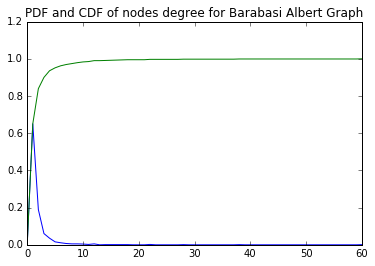

In [3]:
from IPython.display import Image
Image("Barabasi Albert Graph, m = 1 PDF and CDF.png")

#### <hr /> Barabasi Albert Graph for m=3:

In [ ]:
==============================================
    HA-2    Task-1
Sun Feb 28 22:33:23 2016
=============================================
    Barabasi Albert Graph, m = 3
=============================================
Name: barabasi_albert_graph(1010,3)
Type: Graph
Number of nodes: 1010
Number of edges: 3021
Average degree:   5.9822
Average Clustering of BA =  0.0332331621097

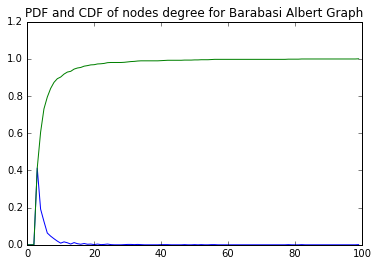

In [4]:
from IPython.display import Image
Image("Barabasi Albert Graph, m = 3 PDF and CDF.png")

Comparing results with m=1 and m=3 we can see that when m=1 the PDF is bigger – the maximum probability of node degree is about 0.6, wherever when m=3 it is about 0.4.

#### <hr /> Model-A Graph for m=1:

In [ ]:
=============================================
    Model A
=============================================
Name: Model-A Graph
Type: Graph
Number of nodes: 1010
Number of edges: 1009
Average degree:   1.9980
Average Path Length =  10.4025002698
Average Clustering Coefficient =  0.0
Sun Feb 28 21:58:53 2016

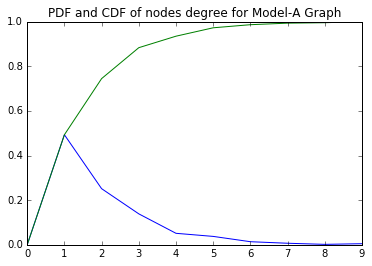

In [5]:
from IPython.display import Image
Image("Model-A, m=1 PDF and CDF.png")

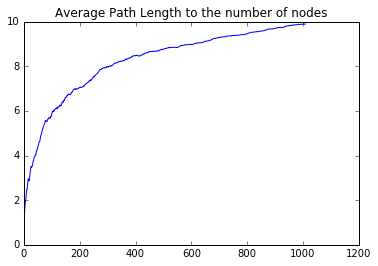

In [6]:
from IPython.display import Image
Image("Model-A, m=1 Average path length.png")

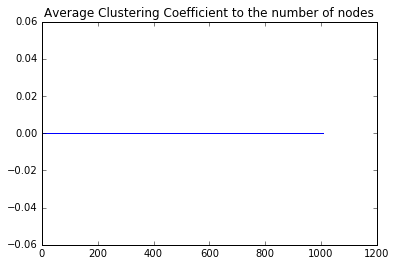

In [7]:
from IPython.display import Image
Image("Model-A, m=1 Average Clustering.png")

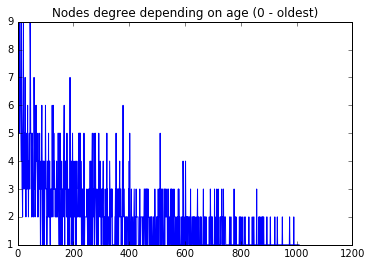

In [12]:
from IPython.display import Image
Image("Model-A, m=1 Nodes degree.png")

#### <hr /> Model-A Graph for m=3:

In [ ]:
=============================================
    Model A
=============================================
Name: Model-A Graph
Type: Graph
Number of nodes: 1010
Number of edges: 3019
Average degree:   5.9782
Average Path Length =  3.98130685219
Average Clustering Coefficient =  0.00696312794618
Sun Feb 28 22:52:15 2016

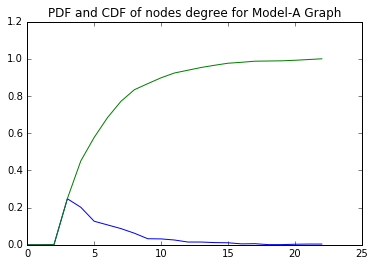

In [1]:
from IPython.display import Image
Image("Model-A, m=3 PDF and CDF.png")

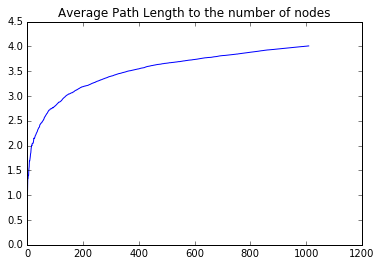

In [15]:
from IPython.display import Image
Image("Model-A, m=3 Average path length.png")

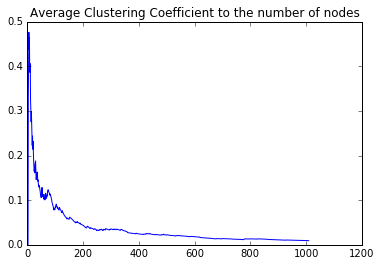

In [16]:
from IPython.display import Image
Image("Model-A, m=3 Average Clustering.png")

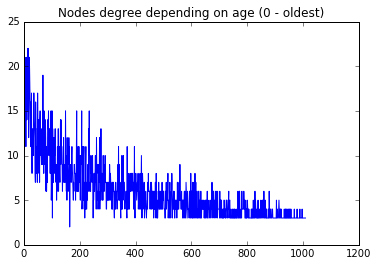

In [17]:
from IPython.display import Image
Image("Model-A, m=3 Nodes degree.png")

Comparing results of PDF and CDF when m=1 and m=3 we can see that in case m=1 the maximum probability of node degree is about 1 and when m=3 it is about 3. So we can assume that these parameters are directly proportional.

Average path length from one node to any other node is 10 when m=1 and is equal to 4 when m=3.
So we can assume that the more the value of m the less average path length becomes. 
 
In both cases m=1 and m=3 we can see that the more age of a node the bigger node degree we get and conversely.  

#### <hr /> Model-B Graph for m=1:

In [ ]:
==============================================
    Model B
==============================================

Number of nodes is fixed, so we can’t calculate and draw for varying number of nodes: 
    - average path length
    - average clustering coefficient
All nodes have equal age
----------------------------------------------
Name: Model-B Graph
Type: Graph
Number of nodes: 1010
Number of edges: 20200
Average degree:  40.0000
Average Path Length =  2.15876517285
Average Clustering Coefficient =  0.0616486383072
==============================================
Sun Feb 28 21:59:08 2016

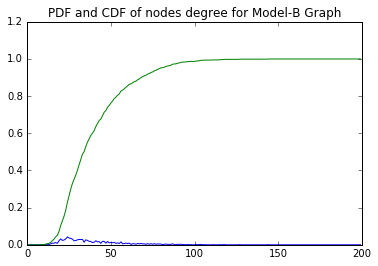

In [17]:
from IPython.display import Image
Image("Model-B, m=1 PDF and CDF.png")

#### <hr /> Model-B Graph for m=3:

In [ ]:
==============================================
    Model B
==============================================

 
Number of nodes is fixed, so can not calculate and draw for varying number of nodes: 
    - average path length
    - average clustering coefficient
All nodes have equal age
----------------------------------------------
Name: Model-B Graph
Type: Graph
Number of nodes: 1010
Number of edges: 20199
Average degree:  39.9980
Average Path Length =  2.17574502743
Average Clustering Coefficient =  0.0623903180095
==============================================
Sun Feb 28 22:52:30 2016

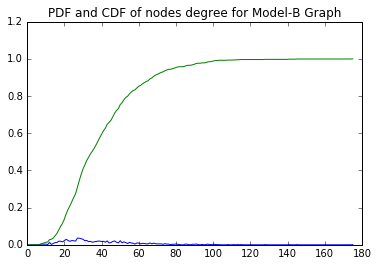

In [18]:
from IPython.display import Image
Image("Model-B, m=3 PDF and CDF.png")

Model A retains growth but does not include preferential attachment. 
The probability of a new node connecting to any pre-existing node is equal. 
The resulting degree distribution in this limit is geometric, 
indicating that growth alone is not sufficient to produce a scale-free structure.

Model B retains preferential attachment but eliminates growth. 
The model begins with a fixed number of disconnected nodes and adds links, 
preferentially choosing high degree nodes as link destinations. 
Though the degree distribution early in the simulation looks scale-free, 
the distribution is not stable, and it eventually becomes nearly Gaussian 
as the network nears saturation. 
So preferential attachment alone is not sufficient to produce 
a scale-free structure.

The failure of models A and B to lead to a scale-free distribution 
indicates that growth and preferential attachment are needed simultaneously 
to reproduce the stationary power-law distribution observed in real networks.

### <hr /> Task 2

Consider the following  "Vertex copying model" of growing network.

At every time step a random vertex from already existing vertices is selected and duplicated together with all edges, such that  every edge of the  vertex
* is copied with probability $q$
* is rewired to any other randomly selected vertex with probability $1-q$


Starting state is defined by some small number of randomly connected vertices.

The model can generate both directed and undirected networks.

1. Generate  graphs based on the model ($N > 1000$ nodes)
2. Compute CDF/PDF, describe the distribution and compute\describe its properties.
3. Illustate the following dependencies: 
    * average path length to the number of nodes
    * average clustering coefficient to the number of nodes
    * average node degee to the nodes "age"
    
Analyse results with respect to various parameter settings

In [ ]:
#-*- coding: latin-1 -*-
"""
At every time step a random vertex from already existing vertices is selected 
and duplicated together with all edges, 
such that every edge of the vertex is copied with probability q
is rewired to any other randomly selected vertex with probability 1-q
Starting state is defined by some small number of randomly connected vertices.

The model can generate both directed and undirected networks.
Generate graphs based on the model (N>1000 nodes)
Compute CDF/PDF, describe the distribution and compute\describe its properties.

Illustate the following dependencies:
	average path length to the number of nodes
	average clustering coefficient to the number of nodes
	average node degee to the nodes "age"
Analyse results with respect to various parameter settings
"""

import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
import time
    
def PDF_CDF_nodes_degree(G, graph_model):   # PDF & CDF calculation and plotting
    h  = nx.degree_histogram(G)
    pdf = np.arange(len(h), dtype=np.float)    
    cdf = np.arange(len(h), dtype=np.float)
    cdfsum = 0.0
    for i in xrange(len(h)):
        pdf[i] = float(h[i])/float(nx.number_of_nodes(G))
        cdf[i] = cdfsum + pdf[i]
        cdfsum = cdf[i]
        
    plt.title("PDF and CDF of nodes degree for " + graph_model + " Graph")
    plt.plot(pdf)
    plt.plot(cdf)
    plt.show()
  
print "=============================================="
print "    HA-2    Task-2"
print "============================================="
print "    Vertex copying model"
print "============================================="

init = 5            # Initial number of nodes
n = 1100            # Total number of nodes
q = 0.5             # Probability of edge copying

print time.ctime()
G = nx.empty_graph(1)       # Create graph with one node
G.name="Vertex copying model Graph"

apl = np.array([0.0 for i in xrange(n)])  # Average Path Length for size of Graph
acc = np.array([0.0 for i in xrange(n)])  # Average Clustering Coefficient  for size of Graph

for i in xrange(1, init):   # Initial Graph Creation
    G.add_node(i)           # add node            
    G.add_edge(i, random.randint(0, i-1))     # add random edge for new node          
    apl[i] = nx.average_shortest_path_length(G)
    acc[i] = nx.average_clustering(G)
  
for i in xrange(init, n):                   # Graph growing by Vertex copying 
    node = random.randint(0, i-1)           # get random node from the graph   
    neighbors = list(nx.all_neighbors(G, node))   # list of neighbors
    #neighbors = list(G.neighbors_iter(node))    
    newnode = i                             # Number for the new node
    G.add_node(newnode)                     # add new node        
    
    for nb in neighbors:                    # for all neighbors 
        if random.random() <= q:
            G.add_edge(newnode, nb)
        else:
            G.add_edge(newnode, random.randint(0, newnode-1))  
    
    if int(i/10)*10 == i:             
        apl[i] = nx.average_shortest_path_length(G)
        acc[i] = nx.average_clustering(G)
        print i, time.ctime()               # running diagnostic
    else:
        apl[i] = apl[i-1]
        acc[i] = acc[i-1]

    if int(i/100)*100 == i:
        PDF_CDF_nodes_degree(G, "Vertex copying model")

        plt.title("Average Path Length to the number of nodes")
        plt.plot(apl)
        plt.show()
    
        plt.title("Average Clustering Coefficient to the number of nodes")
        plt.plot(acc)
        plt.show()

        y = np.empty_like(G.nodes())
        for i in xrange(0, len(G)):
            y[i] = G.degree(i)
        plt.title("Nodes degree depending on age (0 - oldest)")
        plt.plot(y)
        plt.show()
        
        print nx.info(G)
        print "Average Path Length = ", nx.average_shortest_path_length(G)
        print "Average Clustering Coefficient = ", nx.average_clustering(G)
        print "=============================================="
        print time.ctime()

We will change parameter q=0.1, q=0.5 and q=0.9.

### <hr /> for q=0.1:

In [ ]:
Name: Vertex copying model Graph
Type: Graph
Number of nodes: 1001
Number of edges: 60050
Average degree: 119.9800
Average Path Length =  1.88001998002
Average Clustering Coefficient =  0.120697713452
==============================================
Mon Feb 29 22:12:04 2016

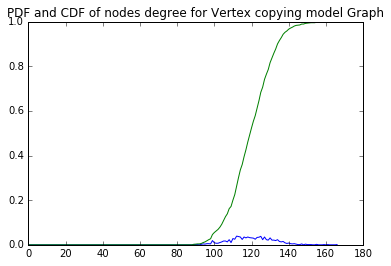

In [33]:
from IPython.display import Image
Image("Task-2 PDF and CDF, q=0.1.png")

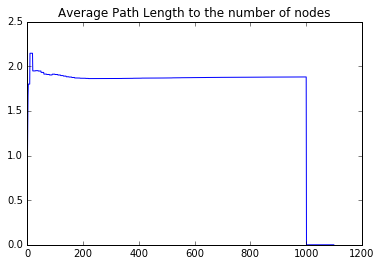

In [34]:
from IPython.display import Image
Image("Task-2 Average Path Length, q=0.1.png")

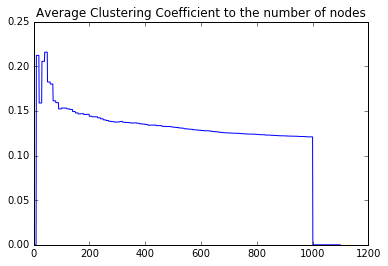

In [35]:
from IPython.display import Image
Image("Task-2 Average Clustering, q=0.1.png")

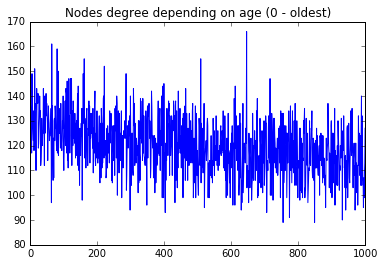

In [36]:
from IPython.display import Image
Image("Task-2 Nodes degree, q=0.1.png")

### <hr /> for q=0.5:

In [ ]:
Name: Vertex copying model Graph
Type: Graph
Number of nodes: 1001
Number of edges: 39071
Average degree:  78.0639
Average Path Length =  1.9285954046
Average Clustering Coefficient =  0.0828885255888
==============================================

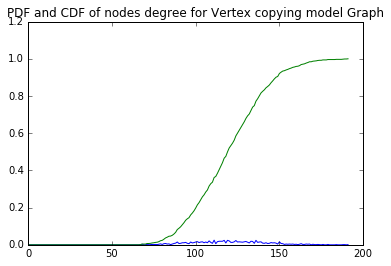

In [25]:
from IPython.display import Image
Image("Task-2 PDF and CDF, q=0.5.png")

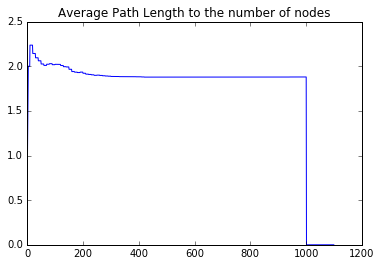

In [26]:
from IPython.display import Image
Image("Task-2 Average Path Length, q=0.5.png")

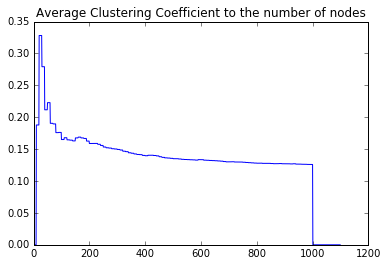

In [27]:
from IPython.display import Image
Image("Task-2 Average Clustering, q=0.5.png")

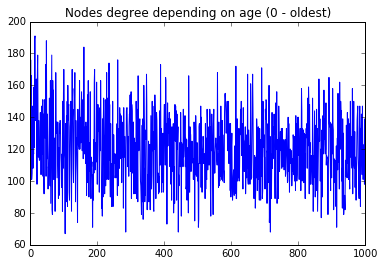

In [28]:
from IPython.display import Image
Image("Task-2 Nodes degree, q=0.5.png")

### <hr /> for q=0.9:

In [ ]:
Name: Vertex copying model Graph
Type: Graph
Number of nodes: 1001
Number of edges: 80027
Average degree: 159.8941
Average Path Length =  1.84123476523
Average Clustering Coefficient =  0.227852135756
==============================================
Mon Feb 29 21:43:17 2016

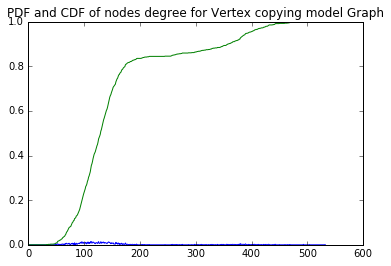

In [29]:
from IPython.display import Image
Image("Task-2 PDF and CDF, q=0.9.png")

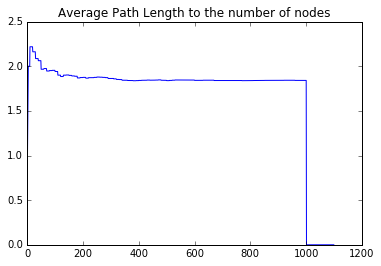

In [30]:
from IPython.display import Image
Image("Task-2 Average Path Length, q=0.9.png")

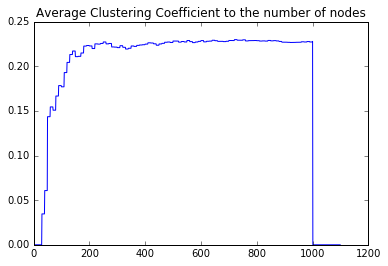

In [31]:
from IPython.display import Image
Image("Task-2 Average Clustering, q=0.9.png")

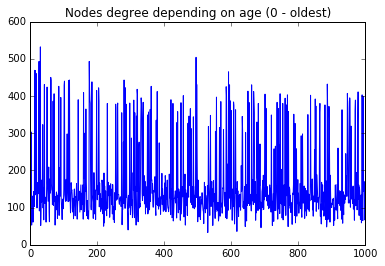

In [32]:
from IPython.display import Image
Image("Task-2 Nodes degree, q=0.9.png")

In "Vertex copying model" of growing network we can see that we have high connectivity, so from one node in a graph to any other we can come in about two or even less steps. 

Here unlike in №1 nodes degree don’t depend on age. We can see that node degree is approximately the same no matter of the value of age. 